# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Rhisa Adika Putri
- Email: rhisaadikaputri2@gmail.com
- Id Dicoding: rhisadkaptri

## Persiapan

### Menyiapkan library yang dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning Model
from sklearn.ensemble import RandomForestClassifier

# Cross Validation -> Untuk menangani data yang tidak balance
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer,accuracy_score,roc_auc_score,precision_score,recall_score,f1_score,log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV

# show all columns
pd.set_option('display.max_columns', None)

### Menyiapkan data yang akan digunakan

In [3]:
# URL mentah dari file CSV di GitHub
url = 'https://raw.githubusercontent.com/rhisadkaptri/Dicoding2/main/data.csv'

# Membaca data dari URL mentah ke dalam DataFrame dengan separator ;
data_ori = pd.read_csv(url, sep=';')

In [4]:
data_ori

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## Data Understanding

In [5]:
data_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [6]:
# melihat lebih spesifik missing value

print(data_ori.isnull().sum())

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
data_ori['Status'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [8]:
data_ori = data_ori[data_ori['Status'] != 'Enrolled']

In [9]:
data_ori

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [10]:
df = data_ori.copy(deep=True)

In [11]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [12]:
# Mengubah Keterangan Kolom
df['Marital_status'] = df['Marital_status'].replace({1: 'single', 2: 'married', 3: 'widower', 4: 'divorced', 5: 'facto union', 6: 'legally separated'})
df['Gender'] = df['Gender'].replace({0: 'Female', 1: 'Male'})
df['Tuition_fees_up_to_date'] = df['Tuition_fees_up_to_date'].replace({0: 'No', 1: 'Yes'})
df['Debtor'] = df['Debtor'].replace({0: 'No', 1: 'Yes'})
df['Daytime_evening_attendance'] = df['Daytime_evening_attendance'].replace({0: 'Evening', 1: 'Daytime'})
df['Scholarship_holder'] = df['Scholarship_holder'].replace({0: 'No', 1: 'Yes'})

In [13]:
df['Application_mode'] = df['Application_mode'].replace({1: '1st-GeneralContingent', 2: 'Ordinance No.612/93', 5: '1st-SpecialContingent(AzoresIsland)',
                                                         7: 'HoldersOfOtherHigher', 10: 'Ordinance No.854-B/99', 15: 'InterStudent(Bachelor)',
                                                         16: '1st-SpecialContingent(MadeiraIsland)', 17: '2nd-GeneralContingent', 18: '3rd-GeneralContingent',
                                                         26: 'Ordinance No.533-A/99(B2)', 27: 'Ordinance No. 533-A/99(B3)',
                                                         39: 'Over 23 years old', 42: 'Transfer', 43: 'ChangeOfCourse', 44: 'TechnologicalSpecializationD.H',
                                                         51: 'ChangeOfInstitution', 53: 'ShortCycleD.H', 57: 'ChangeOfInstitution(Inter))'})

# Exploratory Data Analysis

In [14]:
df

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd-GeneralContingent,5,171,Daytime,1,122.0,1,19,12,5,9,127.3,1,0,No,Yes,Male,No,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,InterStudent(Bachelor),1,9254,Daytime,1,160.0,1,1,3,3,3,142.5,1,0,No,No,Male,No,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st-GeneralContingent,5,9070,Daytime,1,122.0,1,37,37,9,9,124.8,1,0,No,No,Male,No,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd-GeneralContingent,2,9773,Daytime,1,122.0,1,38,37,5,3,119.6,1,0,No,Yes,Female,No,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,8014,Evening,1,100.0,1,37,38,9,9,141.5,0,0,No,Yes,Female,No,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,single,1st-GeneralContingent,6,9773,Daytime,1,125.0,1,1,1,5,4,122.2,0,0,No,Yes,Male,No,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,single,1st-GeneralContingent,2,9773,Daytime,1,120.0,105,1,1,9,9,119.0,1,0,Yes,No,Female,No,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,single,1st-GeneralContingent,1,9500,Daytime,1,154.0,1,37,37,9,9,149.5,1,0,No,Yes,Female,Yes,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,single,1st-GeneralContingent,1,9147,Daytime,1,180.0,1,37,37,7,4,153.8,1,0,No,Yes,Female,Yes,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [15]:
# Simpan DataFrame ke dalam file CSV
df.to_csv('data_dashboard2.csv', index=True)

In [16]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,single,2nd-GeneralContingent,5,171,Daytime,1,122.0,1,19,12,5,9,127.3,1,0,No,Yes,Male,No,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,single,InterStudent(Bachelor),1,9254,Daytime,1,160.0,1,1,3,3,3,142.5,1,0,No,No,Male,No,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,single,1st-GeneralContingent,5,9070,Daytime,1,122.0,1,37,37,9,9,124.8,1,0,No,No,Male,No,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,single,2nd-GeneralContingent,2,9773,Daytime,1,122.0,1,38,37,5,3,119.6,1,0,No,Yes,Female,No,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,married,Over 23 years old,1,8014,Evening,1,100.0,1,37,38,9,9,141.5,0,0,No,Yes,Female,No,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [17]:
def vis_cat(cat_column, title_count, xy_label):
    fig = plt.figure(figsize=(12, 5))

    # Countplot
    ax1 = fig.add_subplot(121)
    sns.countplot(x=df[cat_column], palette='Spectral', ax=ax1, hue=df[cat_column], dodge=False)
    ax1.set_title(title_count)
    ax1.set_xlabel(xy_label)
    ax1.set_ylabel("Count")

    # Check if legend exists and remove it
    if ax1.legend_:
        ax1.legend_.remove()

    # Pie chart
    ax2 = fig.add_subplot(122)
    df[cat_column].value_counts().plot.pie(autopct='%1.2f%%', shadow=True, ax=ax2)
    ax2.set_ylabel('')

### Data Categorical

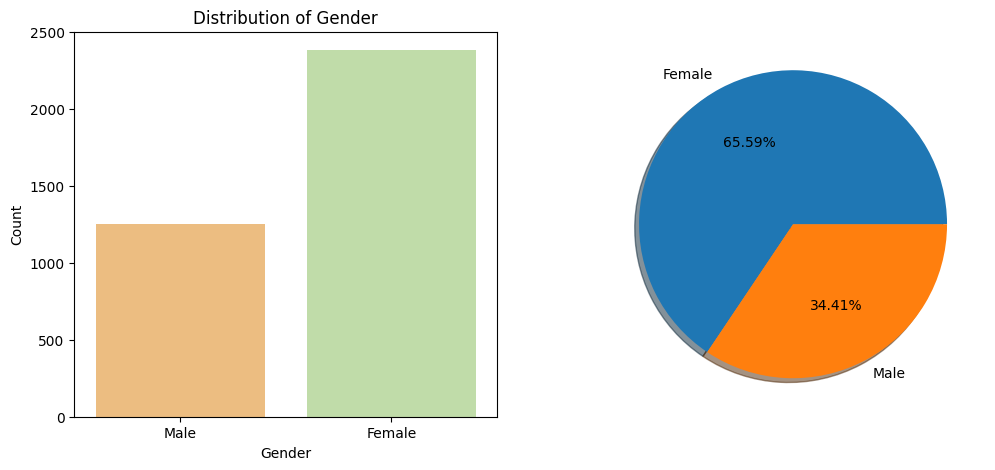

In [18]:
# persebaran data berdasarkan Gender
col = 'Gender'
title_c = 'Distribution of Gender'
label = 'Gender'

vis_cat(col, title_c, label)

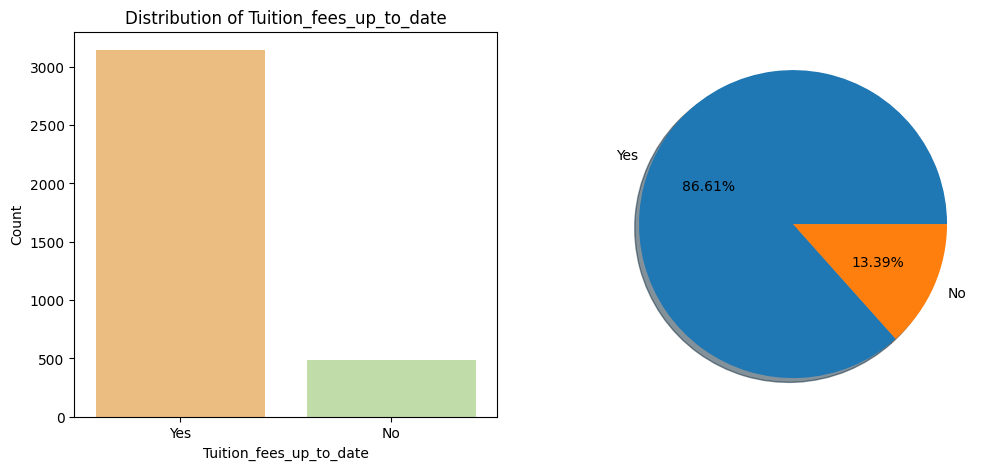

In [19]:
# persebaran data berdasarkan Tuition_fees_up_to_date
col = 'Tuition_fees_up_to_date'
title_c = 'Distribution of Tuition_fees_up_to_date'
label = 'Tuition_fees_up_to_date'

vis_cat(col, title_c, label)

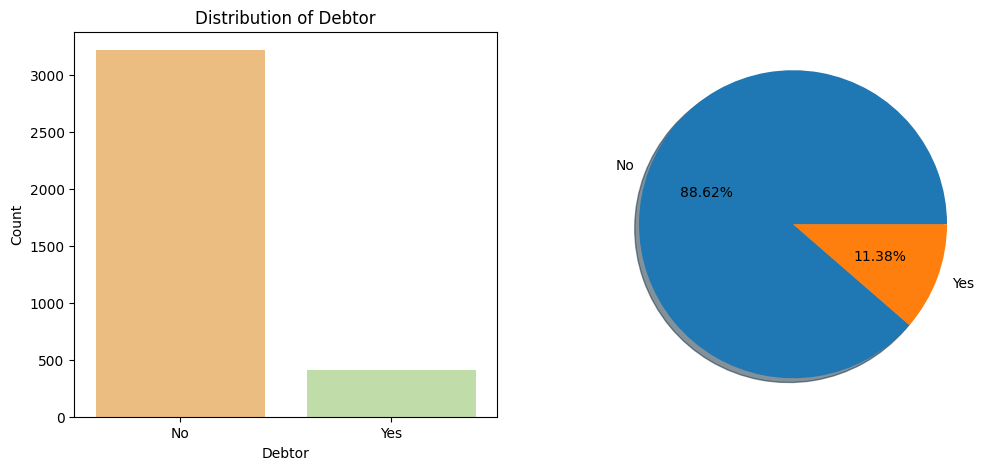

In [20]:
# persebaran data berdasarkan Debtor
col = 'Debtor'
title_c = 'Distribution of Debtor'
label = 'Debtor'

vis_cat(col, title_c, label)

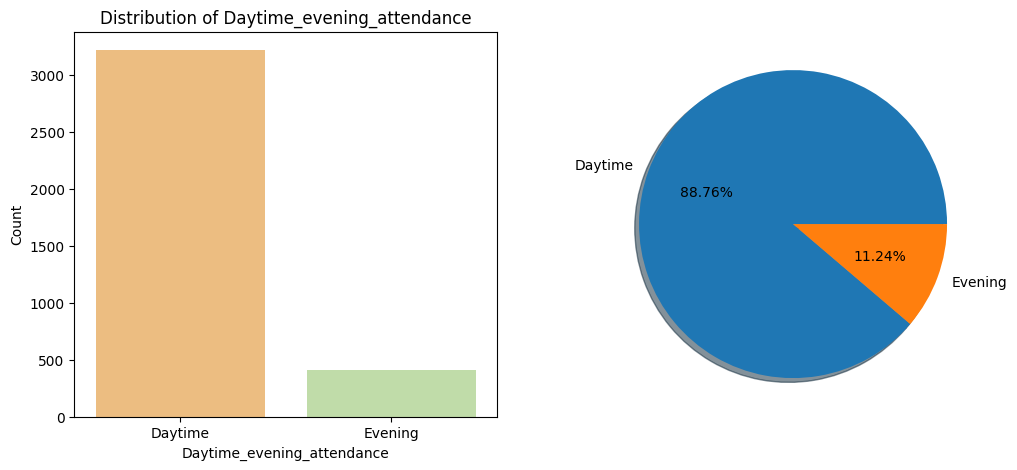

In [21]:
# persebaran data berdasarkan Daytime_evening_attendance
col = 'Daytime_evening_attendance'
title_c = 'Distribution of Daytime_evening_attendance'
label = 'Daytime_evening_attendance'

vis_cat(col, title_c, label)

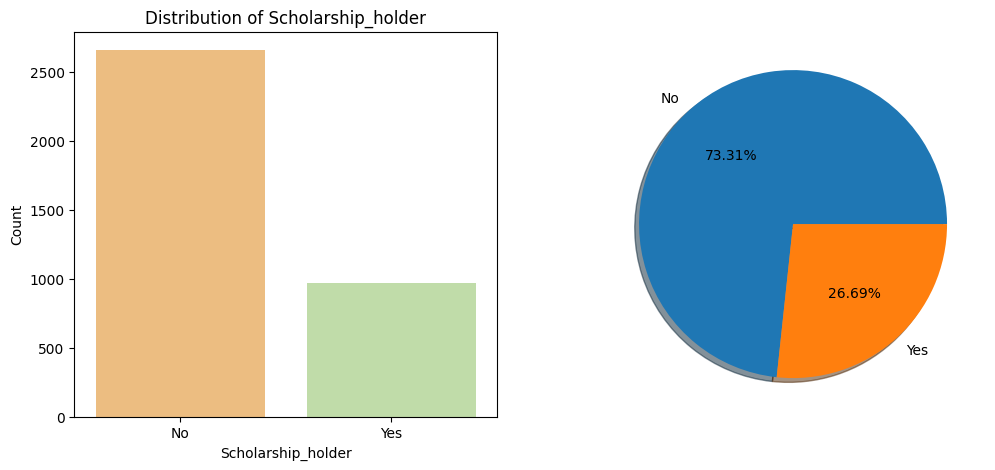

In [22]:
# persebaran data berdasarkan Scholarship_holder
col = 'Scholarship_holder'
title_c = 'Distribution of Scholarship_holder'
label = 'Scholarship_holder'

vis_cat(col, title_c, label)

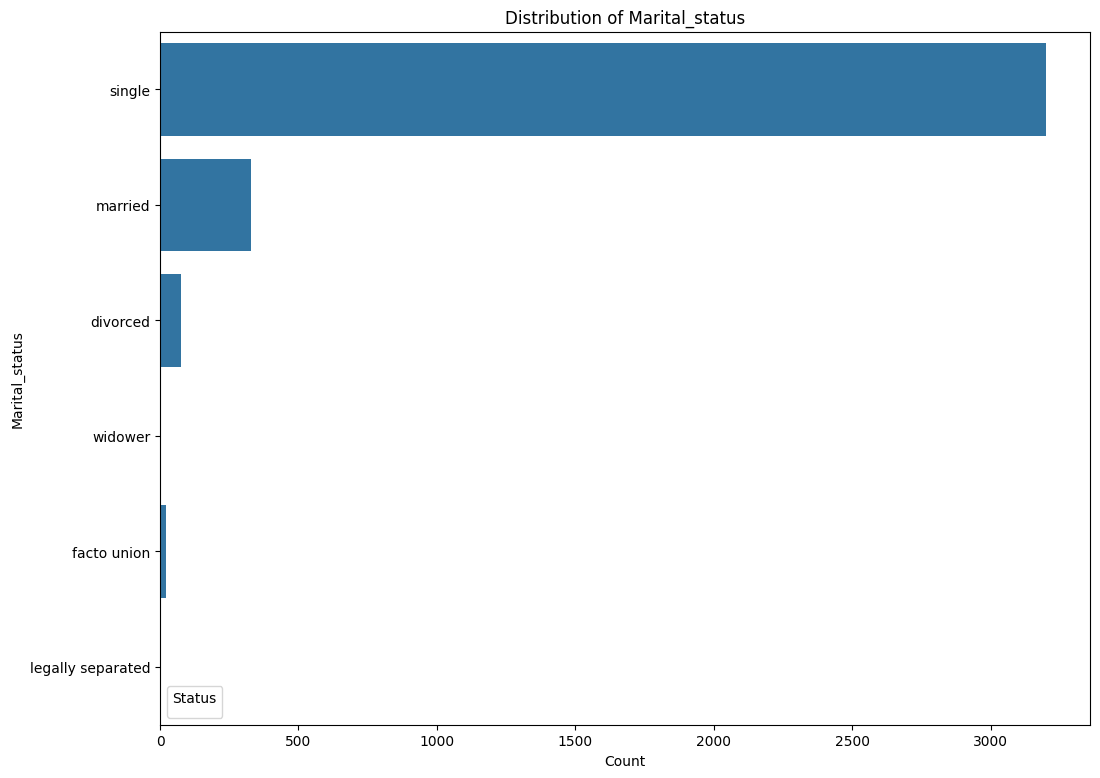

In [23]:
# persebaran data berdasarkan Marital_status
fig = plt.figure(figsize=(12,9))
ax = sns.countplot(y=df['Marital_status'])
plt.title("Distribution of Marital_status")
plt.xlabel("Count")
plt.ylabel("Marital_status")
plt.legend(title='Status')
plt.show()

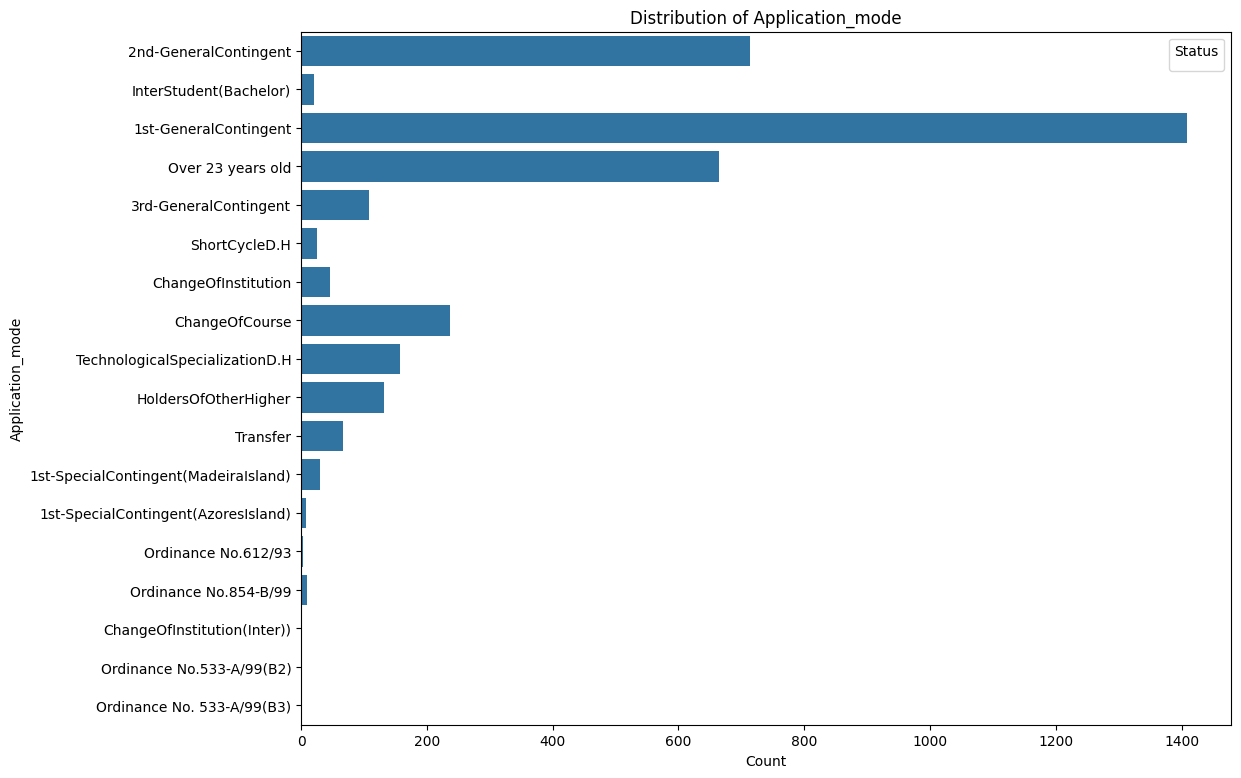

In [24]:
# persebaran data berdasarkan Application_mode
fig = plt.figure(figsize=(12,9))
ax = sns.countplot(y=df['Application_mode'])
plt.title("Distribution of Application_mode")
plt.xlabel("Count")
plt.ylabel("Application_mode")
plt.legend(title='Status')
plt.show()

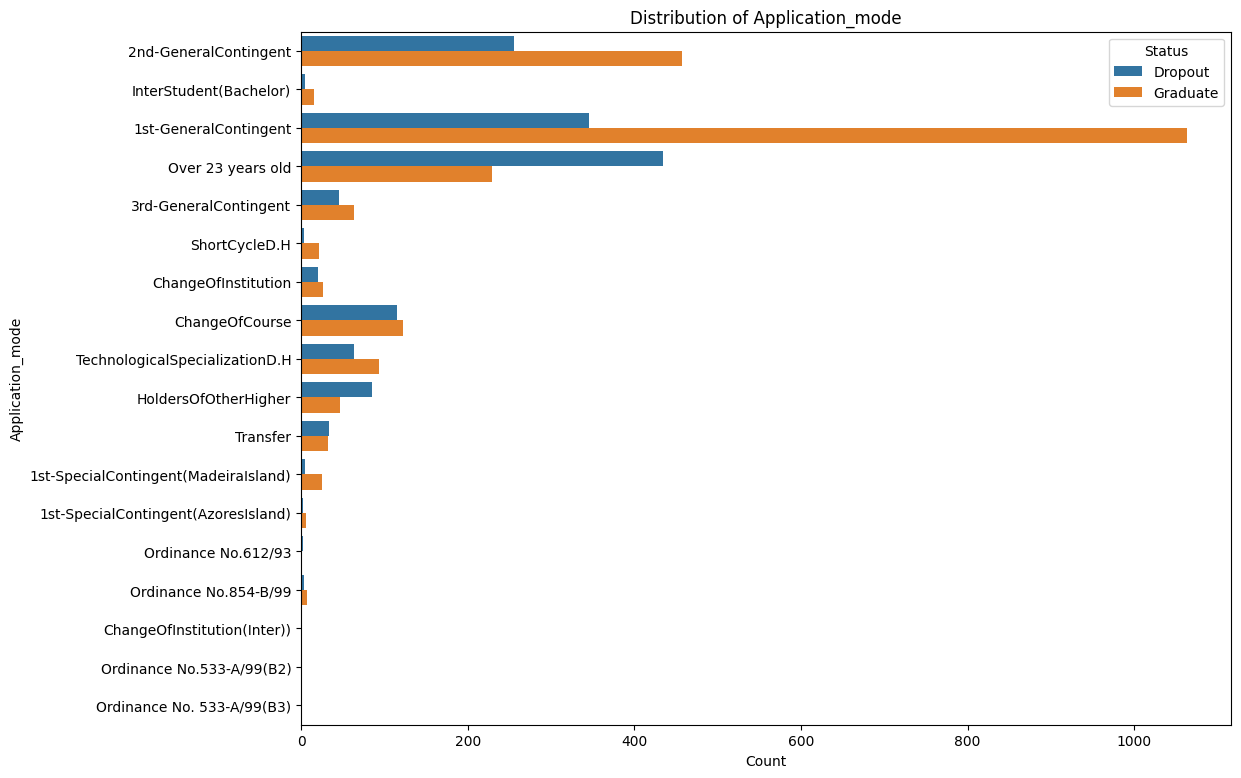

In [25]:
# persebaran data berdasarkan Application_mode
fig = plt.figure(figsize=(12,9))
ax = sns.countplot(y=df['Application_mode'], hue = df['Status'])
plt.title("Distribution of Application_mode")
plt.xlabel("Count")
plt.ylabel("Application_mode")
plt.legend(title='Status')
plt.show()

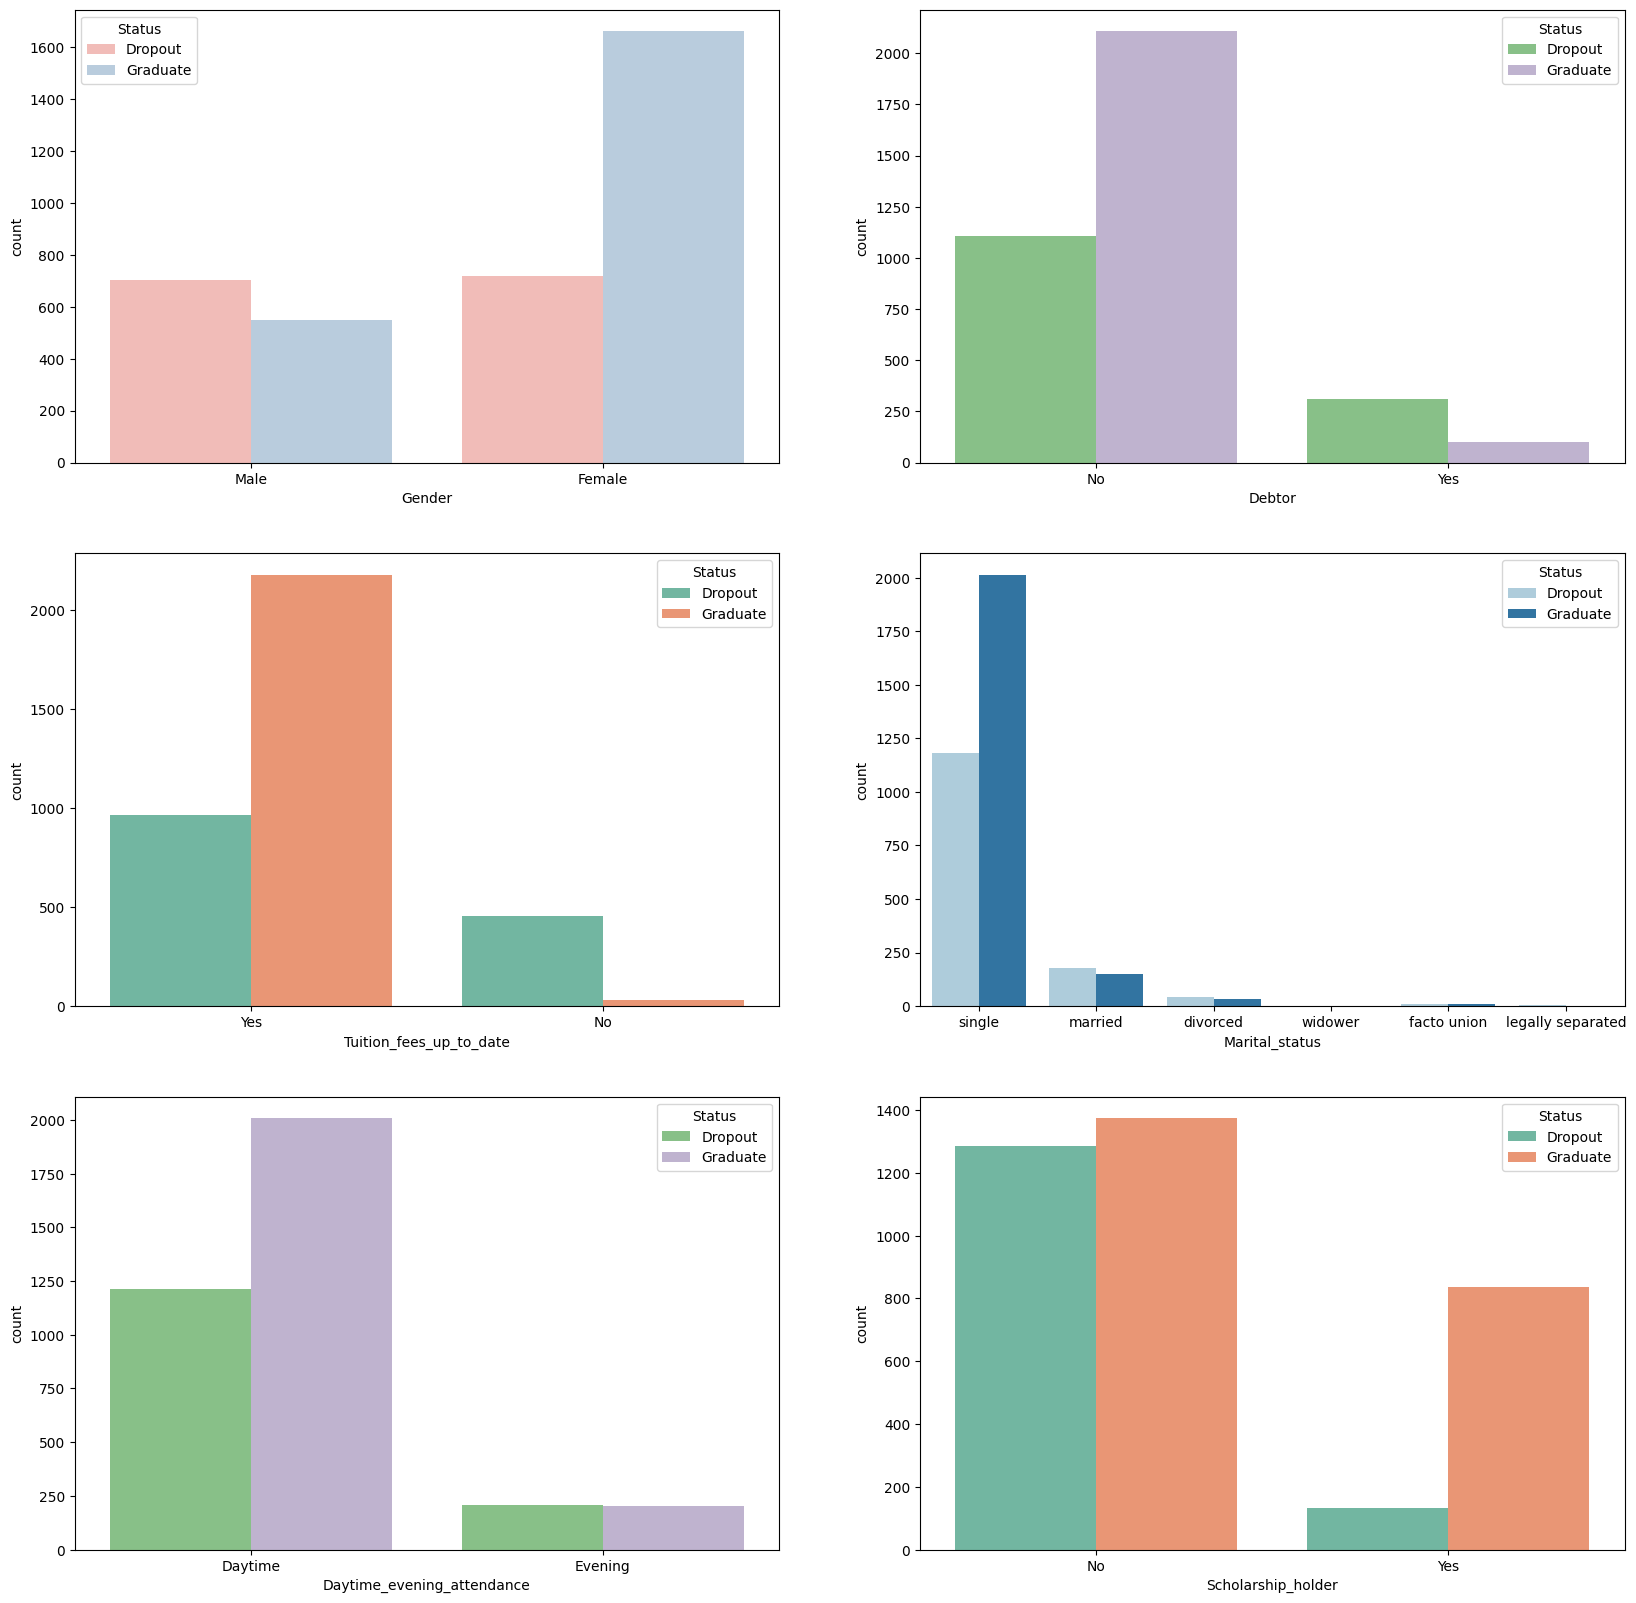

In [26]:
# Pesebaran data berdasarkan Status
fig, axarr = plt.subplots(3, 2, figsize=(20, 20))
sns.countplot(x='Gender', hue = 'Status', data = df, palette='Pastel1', ax=axarr[0][0])
sns.countplot(x='Debtor', hue = 'Status', data = df, palette='Accent',ax=axarr[0][1])
sns.countplot(x='Tuition_fees_up_to_date', hue = 'Status', data = df, palette='Set2', ax=axarr[1][0])
sns.countplot(x='Marital_status', hue = 'Status', data = df, palette='Paired', ax=axarr[1][1])
sns.countplot(x='Daytime_evening_attendance', hue = 'Status', data = df, palette='Accent', ax=axarr[2][0])
sns.countplot(x='Scholarship_holder', hue = 'Status', data = df, palette='Set2', ax=axarr[2][1])
plt.show()

#### Insight:

Berdasarkan visualisasi yang telah dilakukan, dapat disimpulkan dalam beberapa poin bahwa:

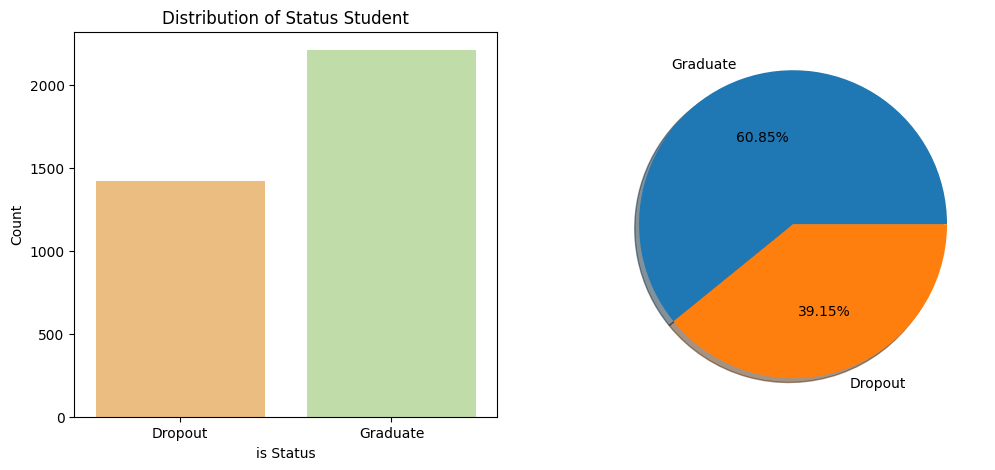

In [27]:
# Pesebaran data berdasarkan Status
col = 'Status'
title_c = 'Distribution of Status Student'
label = 'is Status'

vis_cat(col, title_c, label)

### Data Numerical

<Figure size 1200x500 with 0 Axes>

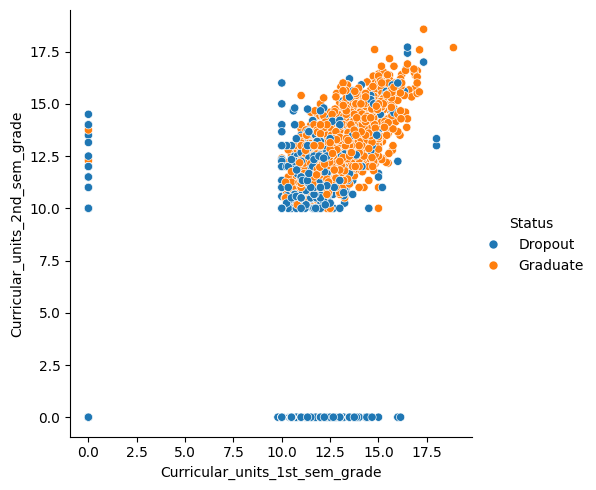

In [28]:
plt.figure(figsize=(12, 5))
sns.relplot(x='Curricular_units_1st_sem_grade', y='Curricular_units_2nd_sem_grade', hue='Status', data=df)

#### Insight:

Berdasarkan visualisasi diatas, dapat dilihat bahwa

<Figure size 1200x500 with 0 Axes>

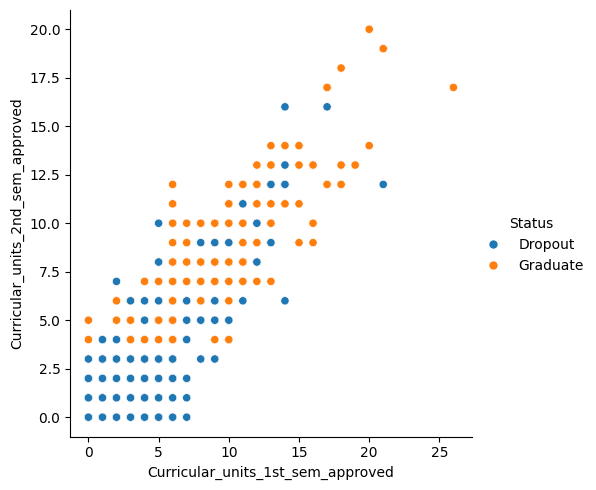

In [29]:
plt.figure(figsize=(12, 5))
sns.relplot(x='Curricular_units_1st_sem_approved', y='Curricular_units_2nd_sem_approved', hue='Status', data=df)

#### Insight:

Berdasarkan visualisasi diatas, dapat dilihat bahwa

## Data Preparation / Preprocessing

In [30]:
# Convertin the predictor variable in a binary numeric variable
data_ori['Status'].replace(to_replace='Graduate', value=1, inplace=True)
data_ori['Status'].replace(to_replace='Dropout', value=0, inplace=True)

<ipython-input-30-08284b699211>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ori['Status'].replace(to_replace='Graduate', value=1, inplace=True)
<ipython-input-30-08284b699211>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ori['Status'].replace(to_replace='Dropout', value=0, inplace=True)


In [31]:
data_ori

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,5,4,122.2,0,0,0,1,1,0,19,0,0,6,7,5,13.600000,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06,1
4420,1,1,2,9773,1,1,120.0,105,1,1,9,9,119.0,1,0,1,0,0,0,18,1,0,6,6,6,12.000000,0,0,6,6,2,11.000000,0,11.1,0.6,2.02,0
4421,1,1,1,9500,1,1,154.0,1,37,37,9,9,149.5,1,0,0,1,0,1,30,0,0,7,8,7,14.912500,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79,0
4422,1,1,1,9147,1,1,180.0,1,37,37,7,4,153.8,1,0,0,1,0,1,20,0,0,5,5,5,13.800000,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,1


In [32]:
df_new = data_ori

In [33]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                3630 non-null   int64  
 1   Application_mode                              3630 non-null   int64  
 2   Application_order                             3630 non-null   int64  
 3   Course                                        3630 non-null   int64  
 4   Daytime_evening_attendance                    3630 non-null   int64  
 5   Previous_qualification                        3630 non-null   int64  
 6   Previous_qualification_grade                  3630 non-null   float64
 7   Nacionality                                   3630 non-null   int64  
 8   Mothers_qualification                         3630 non-null   int64  
 9   Fathers_qualification                         3630 non-null   int64 

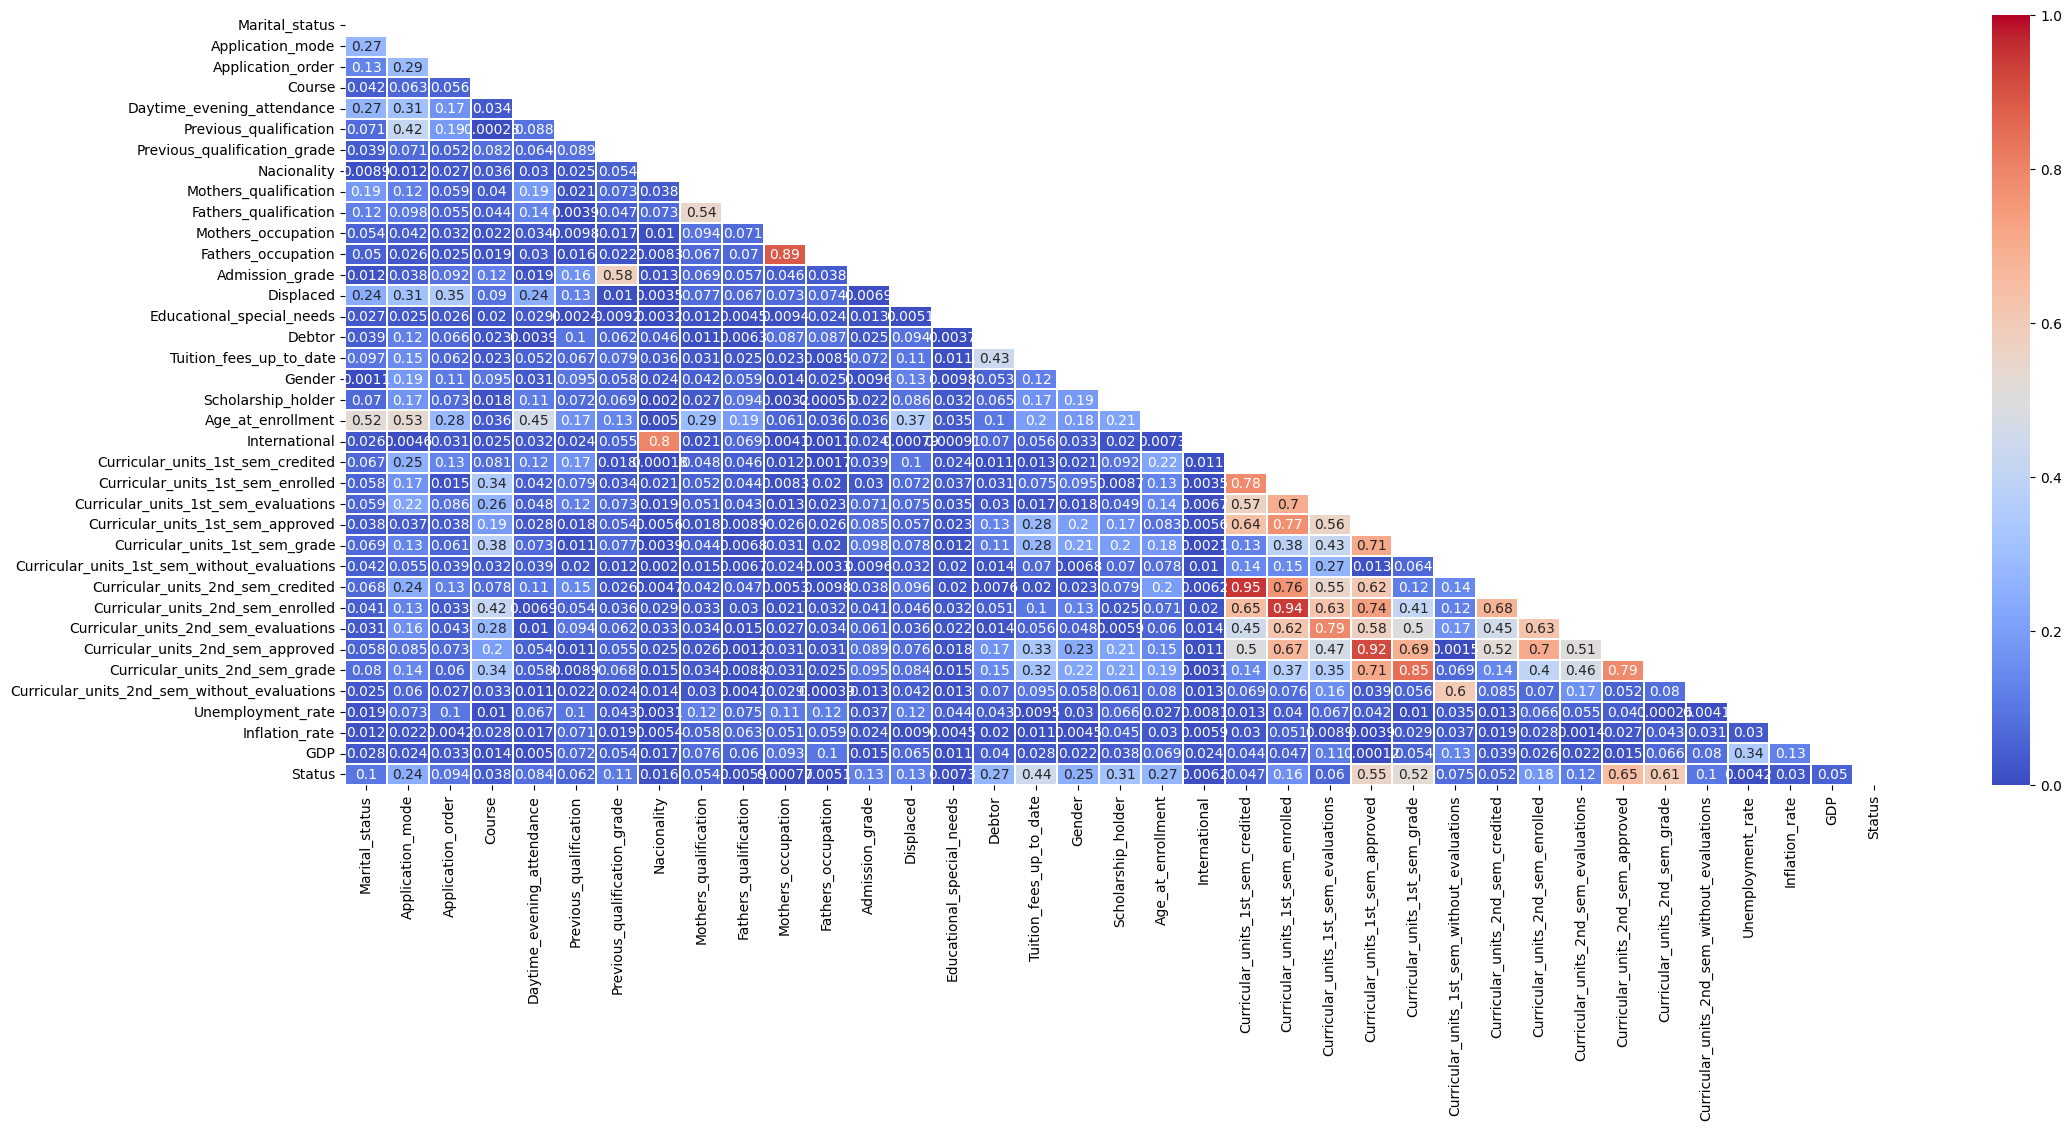

In [34]:
numerical_columns = df_new.select_dtypes(include=[np.number])

plt.figure(figsize=(25, 10))
corr = numerical_columns.corr().abs()
mask = np.triu(np.ones_like(corr))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns,
                 annot=True, linewidths=.2, cmap='coolwarm', vmin=0, vmax=1)
plt.show()

In [35]:
df_new.corr()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
Marital_status,1.000000,0.274985,-0.130370,0.042012,-0.265823,0.070984,-0.038869,-0.008899,0.185117,0.124995,0.053892,0.050499,-0.012440,-0.240544,-0.027434,0.039470,-0.096920,-0.001124,-0.069684,0.522359,-0.026153,0.066666,0.058094,0.059191,-0.037691,-0.069442,0.041535,0.067508,0.041256,0.030786,-0.058400,-0.079536,0.025193,-0.018959,0.011932,-0.028391,-0.100479
Application_mode,0.274985,1.000000,-0.287245,0.063112,-0.310854,0.416666,-0.071190,-0.011711,0.122697,0.098216,0.041650,0.025629,-0.038311,-0.308730,-0.024611,0.121456,-0.154143,0.186338,-0.174835,0.531601,-0.004620,0.248883,0.168857,0.220351,-0.037250,-0.133919,0.054923,0.244575,0.130559,0.163626,-0.085270,-0.137288,0.060434,0.072870,-0.021895,-0.023945,-0.244507
Application_order,-0.130370,-0.287245,1.000000,0.056238,0.165494,-0.187881,-0.051715,-0.026706,-0.058649,-0.055254,-0.032459,-0.025308,-0.092324,0.345791,0.025712,-0.066227,0.061610,-0.106059,0.072899,-0.281641,-0.030576,-0.133504,-0.015182,-0.086004,0.038274,0.060776,-0.038958,-0.127599,0.033125,-0.042519,0.072595,0.059817,-0.026822,-0.099767,-0.004228,0.033031,0.094355
Course,0.042012,0.063112,0.056238,1.000000,-0.033887,-0.000230,-0.081792,-0.036492,0.039976,0.043931,0.021518,0.019156,-0.123865,-0.090136,-0.019591,-0.023103,0.023489,-0.094888,0.018123,0.036323,-0.024819,-0.081195,0.341673,0.264445,0.188602,0.381512,0.031539,-0.078037,0.415262,0.281016,0.199739,0.335016,0.033454,0.010375,0.027855,-0.014411,0.038135
Daytime_evening_attendance,-0.265823,-0.310854,0.165494,-0.033887,1.000000,-0.087616,0.063810,0.030334,-0.188876,-0.135725,-0.034175,-0.030082,0.018610,0.243653,0.029207,0.003900,0.052186,-0.030507,0.110240,-0.453741,0.032494,-0.124038,-0.041503,-0.048432,0.028265,0.073270,0.039307,-0.105494,0.006915,0.009977,0.054211,0.058371,-0.010504,0.067192,-0.017326,0.005007,0.084496
Previous_qualification,0.070984,0.416666,-0.187881,-0.000230,-0.087616,1.000000,0.089194,-0.025211,-0.021399,0.003865,0.009810,0.015577,0.164962,-0.126811,-0.002446,0.100771,-0.067020,0.094667,-0.071748,0.169046,-0.023995,0.168644,0.078829,0.123573,0.018125,-0.010938,0.020155,0.147389,0.054375,0.094175,-0.010854,-0.008933,0.022257,0.102451,-0.070746,0.072121,-0.062323
Previous_qualification_grade,-0.038869,-0.071190,-0.051715,-0.081792,0.063810,0.089194,1.000000,0.053888,-0.073035,-0.047147,-0.017383,-0.022169,0.577241,-0.010238,0.009246,-0.062201,0.079246,-0.057654,0.069054,-0.133535,0.055494,-0.017717,-0.033503,-0.072595,0.054120,0.077191,-0.011857,-0.026107,-0.036162,-0.061730,0.055232,0.068240,-0.023654,0.043345,0.019247,-0.054349,0.109464
Nacionality,-0.008899,-0.011711,-0.026706,-0.036492,0.030334,-0.025211,0.053888,1.000000,-0.038168,-0.073033,0.010331,0.008297,0.013500,-0.003521,-0.003216,0.046457,-0.035985,-0.024381,-0.002002,-0.004959,0.797387,0.000178,-0.020632,-0.018671,-0.005631,-0.003854,-0.002042,-0.004657,-0.029476,-0.032890,-0.024523,-0.014859,-0.014388,0.003110,-0.005440,0.017080,-0.015516
Mothers_qualification,0.185117,0.122697,-0.058649,0.039976,-0.188876,-0.021399,-0.073035,-0.038168,1.000000,0.543890,0.093654,0.067471,-0.068855,-0.077115,-0.011930,0.011229,-0.031185,-0.042377

In [36]:
df_corr_abs = df_new.corr()
df_corr_abs = df_corr_abs['Status'].drop('Status')
df_corr_abs.abs().sort_values(ascending=False)

Curricular_units_2nd_sem_approved               0.653995
Curricular_units_2nd_sem_grade                  0.605350
Curricular_units_1st_sem_approved               0.554881
Curricular_units_1st_sem_grade                  0.519927
Tuition_fees_up_to_date                         0.442138
Scholarship_holder                              0.313018
Age_at_enrollment                               0.267229
Debtor                                          0.267207
Gender                                          0.251955
Application_mode                                0.244507
Curricular_units_2nd_sem_enrolled               0.182897
Curricular_units_1st_sem_enrolled               0.161074
Admission_grade                                 0.128058
Displaced                                       0.126113
Curricular_units_2nd_sem_evaluations            0.119239
Previous_qualification_grade                    0.109464
Curricular_units_2nd_sem_without_evaluations    0.102687
Marital_status                 

In [37]:
# tentukan variabel X dan variabel y
X = df_new.loc[:, df_new.columns != 'Status']
y = df_new['Status']

In [38]:
df_final = data_ori[['Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_approved',
                     'Tuition_fees_up_to_date', 'Scholarship_holder', 'Age_at_enrollment', 'Debtor', 'Gender', 'Application_mode', 'Status']]
df_final

,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Gender,Application_mode,Status
0,0.000000,0,0.000000,0,1,0,20,0,1,17,0
1,14.000000,6,13.666667,6,0,0,19,0,1,15,1
2,0.000000,0,0.000000,0,0,0,19,0,1,1,0
3,13.428571,6,12.400000,5,1,0,20,0,0,17,1
4,12.333333,5,13.000000,6,1,0,45,0,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...
4419,13.600000,5,12.666667,5,1,0,19,0,1,1,1
4420,12.000000,6,11.000000,2,0,0,18,1,0,1,0
4421,14.912500,7,13.500000,1,1,1,30,0,0,1,0
4422,13.800000,5,12.000000,5,1,1,20,0,0,1,1


In [39]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Curricular_units_1st_sem_grade     3630 non-null   float64
 1   Curricular_units_1st_sem_approved  3630 non-null   int64  
 2   Curricular_units_2nd_sem_grade     3630 non-null   float64
 3   Curricular_units_2nd_sem_approved  3630 non-null   int64  
 4   Tuition_fees_up_to_date            3630 non-null   int64  
 5   Scholarship_holder                 3630 non-null   int64  
 6   Age_at_enrollment                  3630 non-null   int64  
 7   Debtor                             3630 non-null   int64  
 8   Gender                             3630 non-null   int64  
 9   Application_mode                   3630 non-null   int64  
 10  Status                             3630 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 469.4 KB


<Axes: >

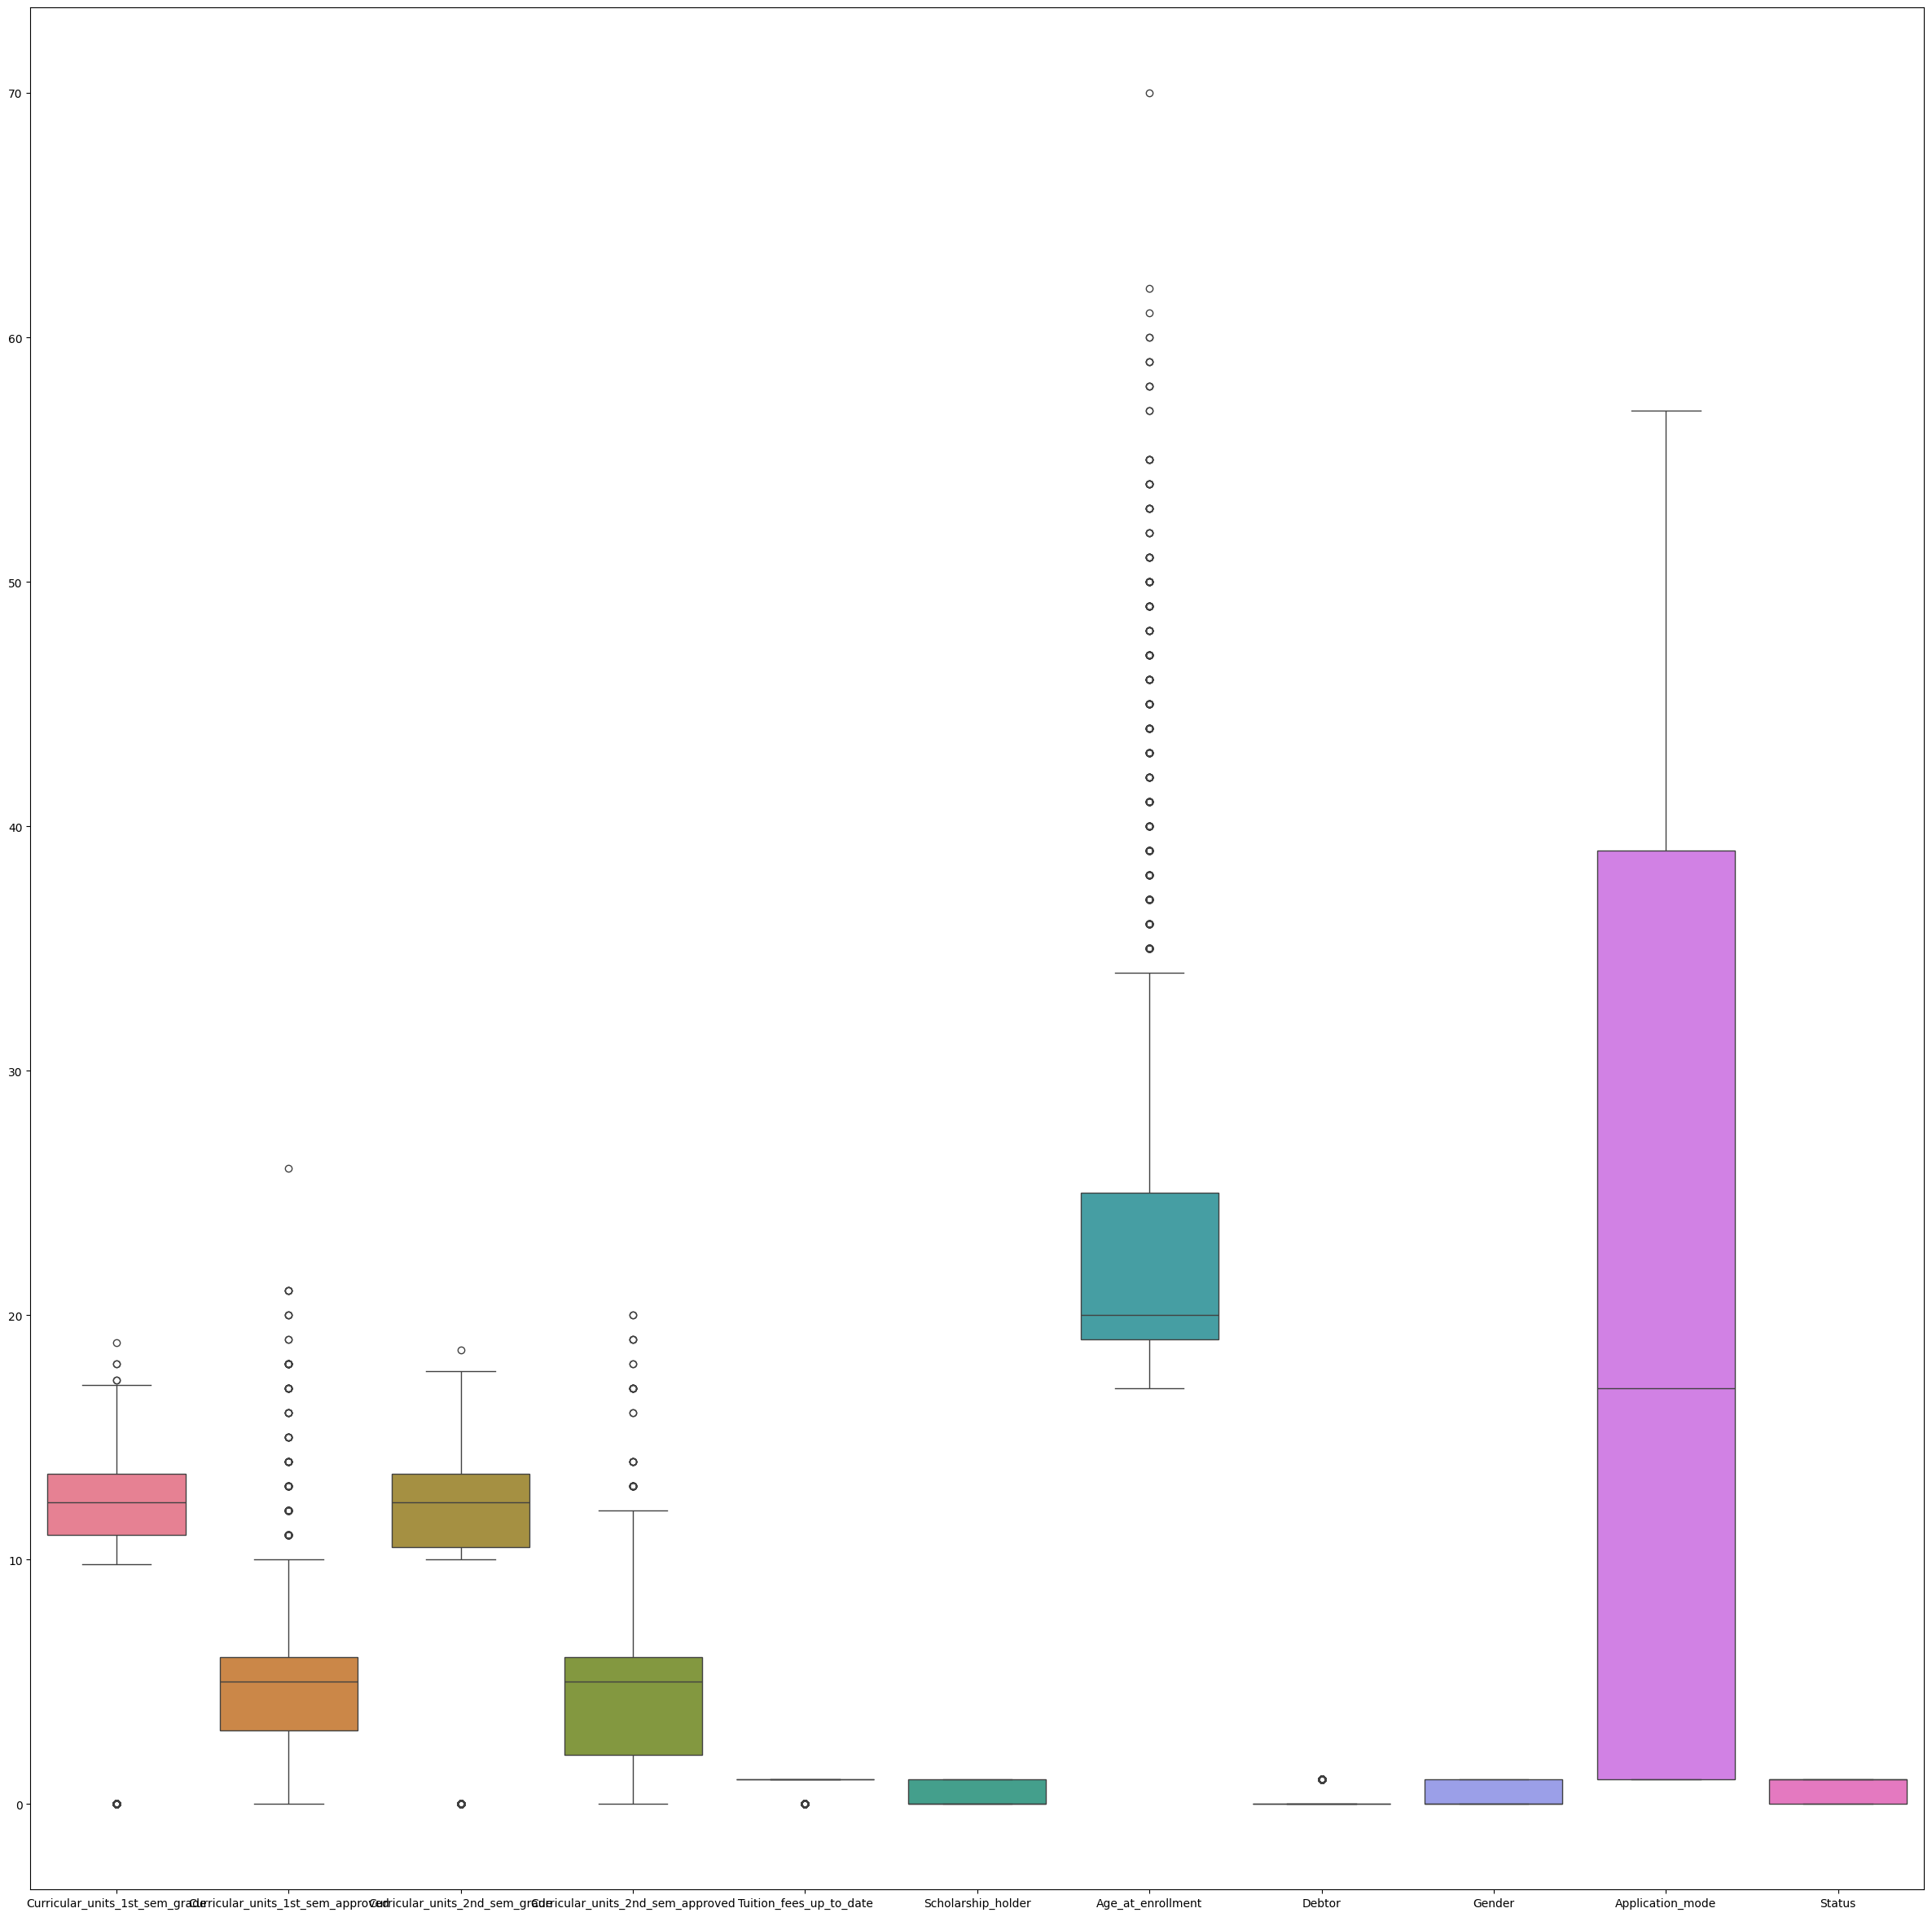

In [40]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data = df_final)

In [41]:
# Z-Score
columns = ['Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_approved', 'Age_at_enrollment']

for col in columns:
    upper_limit = df_final[col].mean() + 3 * df_final[col].std()
    lower_limit = df_final[col].mean() - 3 * df_final[col].std()

    df_final.loc[df_final[col] > upper_limit, col] = upper_limit
    df_final.loc[df_final[col] < lower_limit, col] = lower_limit

<Axes: >

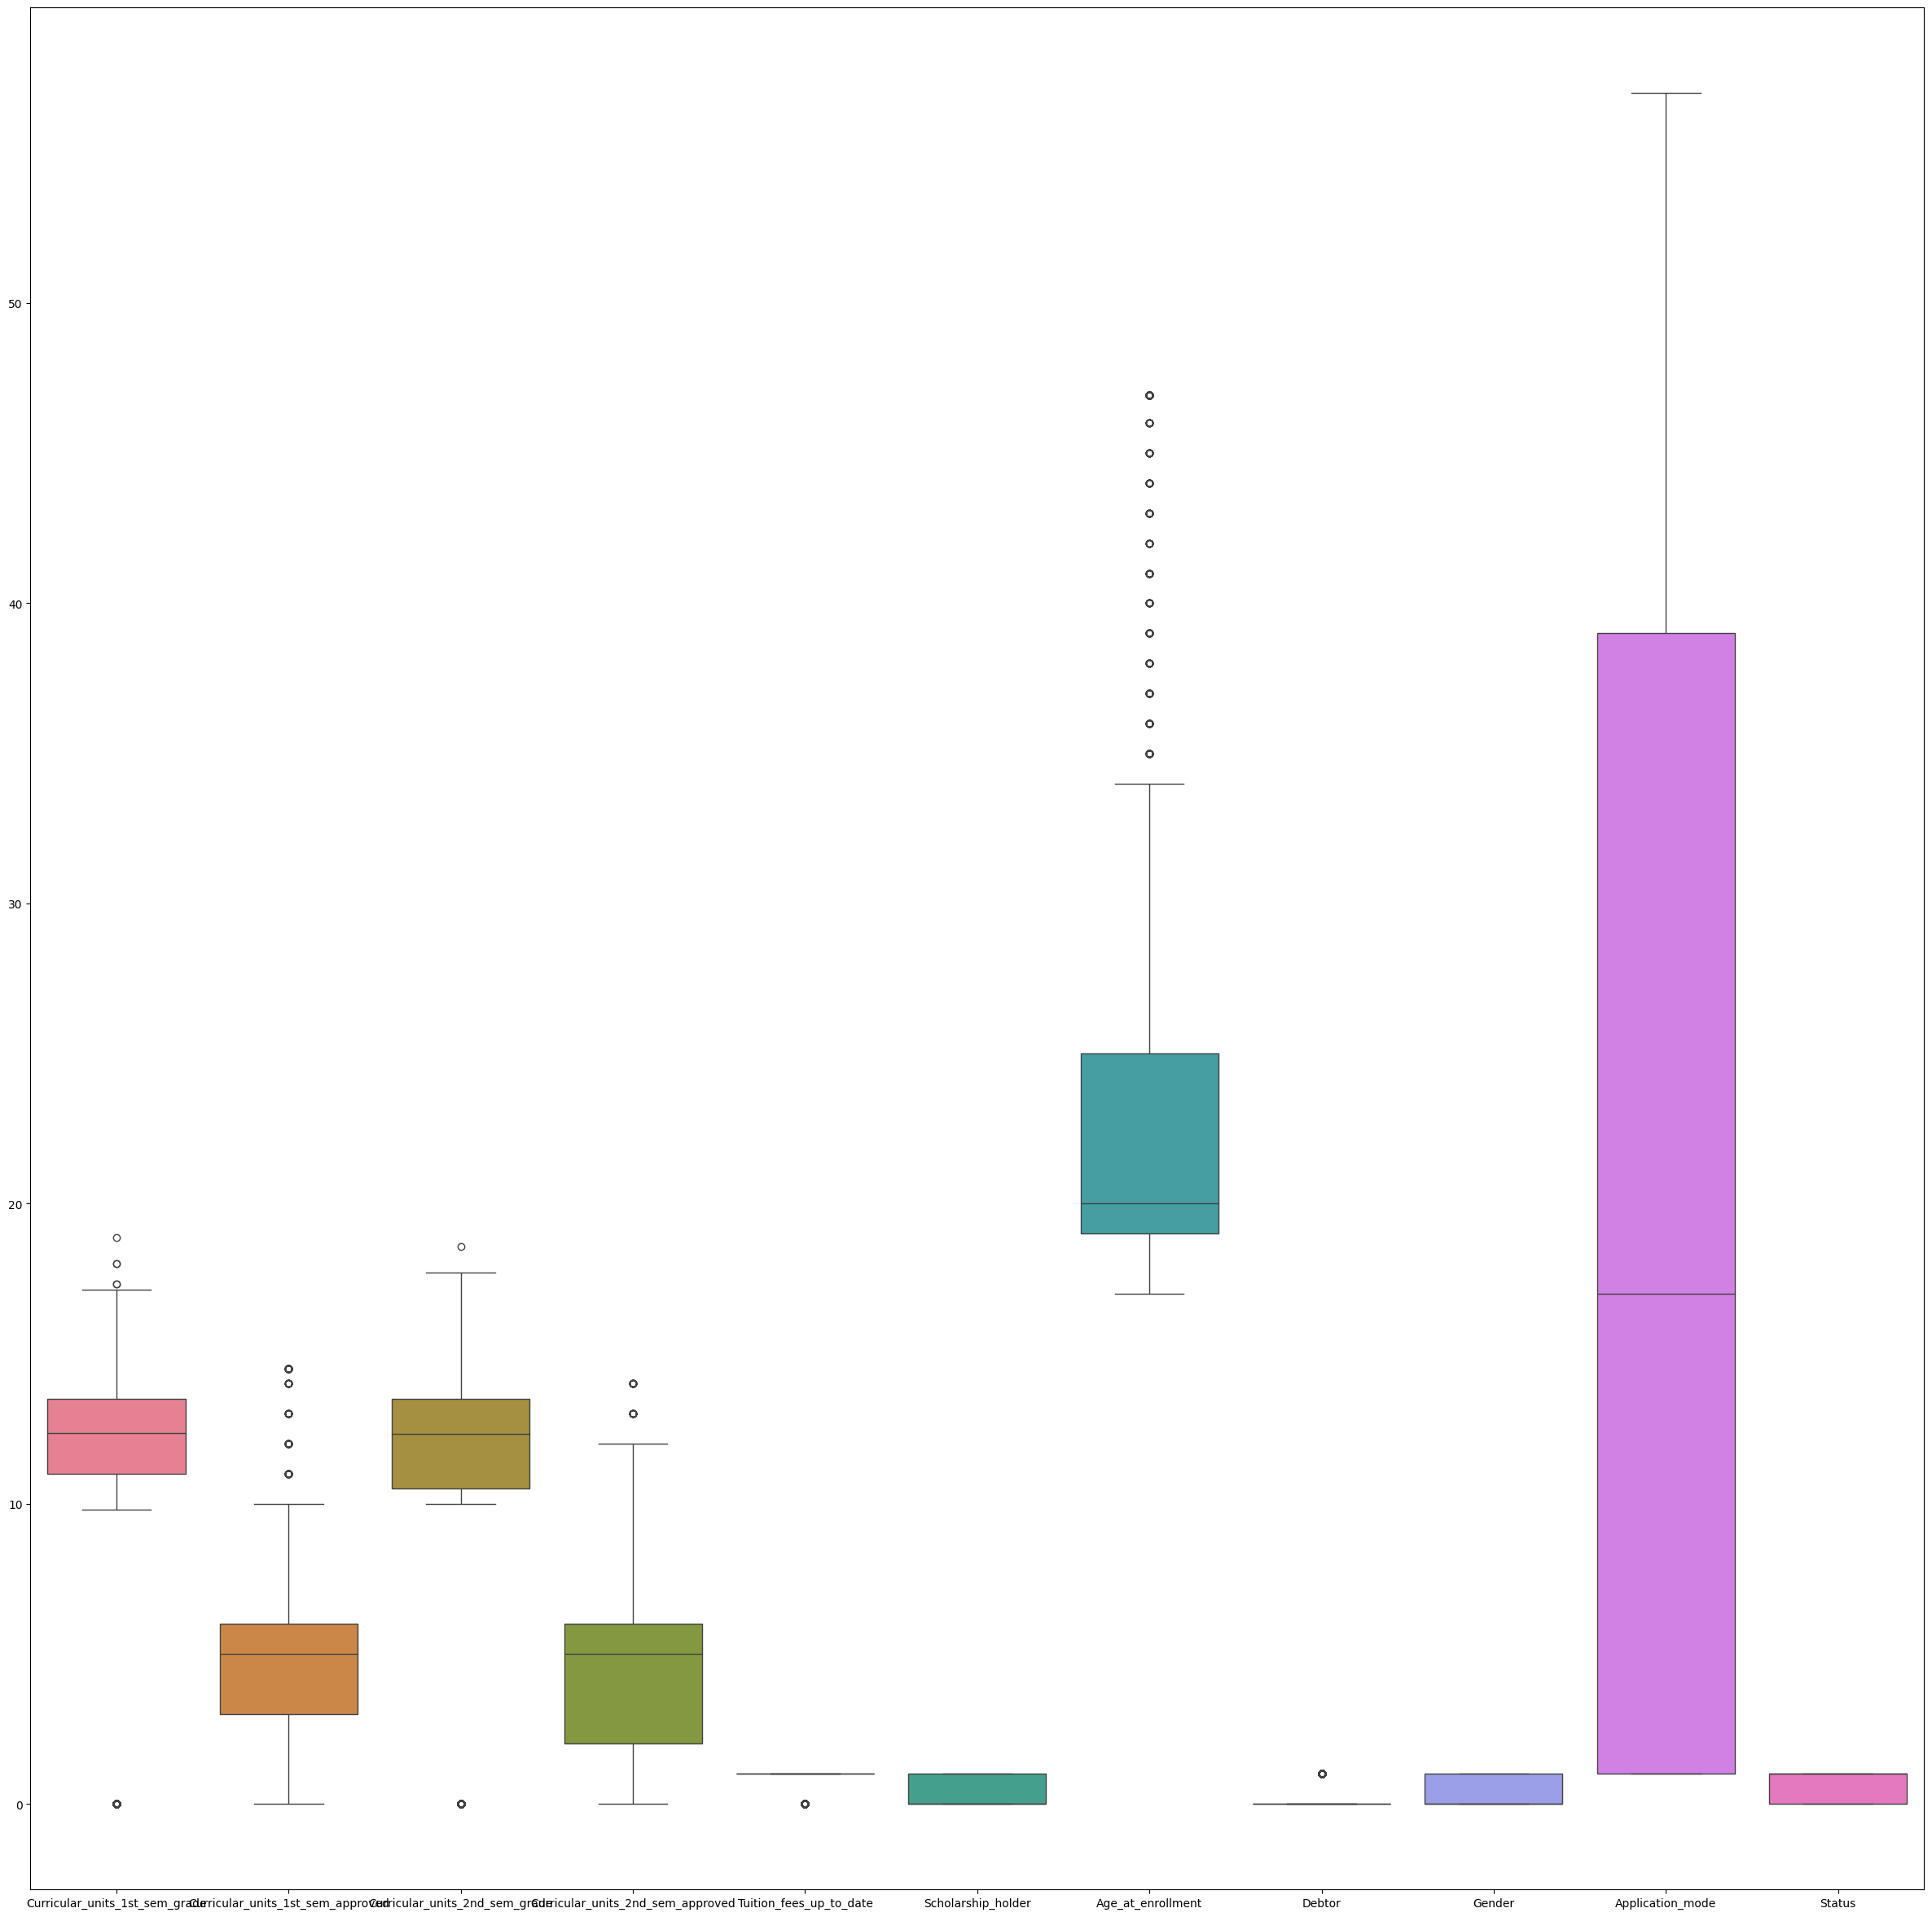

In [42]:
fig, ax = plt.subplots(figsize=(30,30))
sns.boxplot(data = df_final)

In [43]:
df_final

,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Gender,Application_mode,Status
0,0.000000,0.0,0.000000,0.0,1,0,20.0,0,1,17,0
1,14.000000,6.0,13.666667,6.0,0,0,19.0,0,1,15,1
2,0.000000,0.0,0.000000,0.0,0,0,19.0,0,1,1,0
3,13.428571,6.0,12.400000,5.0,1,0,20.0,0,0,17,1
4,12.333333,5.0,13.000000,6.0,1,0,45.0,0,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...
4419,13.600000,5.0,12.666667,5.0,1,0,19.0,0,1,1,1
4420,12.000000,6.0,11.000000,2.0,0,0,18.0,1,0,1,0
4421,14.912500,7.0,13.500000,1.0,1,1,30.0,0,0,1,0
4422,13.800000,5.0,12.000000,5.0,1,1,20.0,0,0,1,1


In [44]:
# One Hot Encoding semua features
df_dummies = pd.get_dummies(df_final)

In [45]:
df_dummies

,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_approved,Tuition_fees_up_to_date,Scholarship_holder,Age_at_enrollment,Debtor,Gender,Application_mode,Status
0,0.000000,0.0,0.000000,0.0,1,0,20.0,0,1,17,0
1,14.000000,6.0,13.666667,6.0,0,0,19.0,0,1,15,1
2,0.000000,0.0,0.000000,0.0,0,0,19.0,0,1,1,0
3,13.428571,6.0,12.400000,5.0,1,0,20.0,0,0,17,1
4,12.333333,5.0,13.000000,6.0,1,0,45.0,0,0,39,1
...,...,...,...,...,...,...,...,...,...,...,...
4419,13.600000,5.0,12.666667,5.0,1,0,19.0,0,1,1,1
4420,12.000000,6.0,11.000000,2.0,0,0,18.0,1,0,1,0
4421,14.912500,7.0,13.500000,1.0,1,1,30.0,0,0,1,0
4422,13.800000,5.0,12.000000,5.0,1,1,20.0,0,0,1,1


In [46]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Curricular_units_1st_sem_grade     3630 non-null   float64
 1   Curricular_units_1st_sem_approved  3630 non-null   float64
 2   Curricular_units_2nd_sem_grade     3630 non-null   float64
 3   Curricular_units_2nd_sem_approved  3630 non-null   float64
 4   Tuition_fees_up_to_date            3630 non-null   int64  
 5   Scholarship_holder                 3630 non-null   int64  
 6   Age_at_enrollment                  3630 non-null   float64
 7   Debtor                             3630 non-null   int64  
 8   Gender                             3630 non-null   int64  
 9   Application_mode                   3630 non-null   int64  
 10  Status                             3630 non-null   int64  
dtypes: float64(5), int64(6)
memory usage: 469.4 KB


# Modeling

## Split Data

In [47]:
# Search CV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

In [48]:
# tentukan variabel X dan variabel y
X = df_dummies.loc[:, df_dummies.columns != 'Status']
y = df_dummies['Status']

In [49]:
# check the proportion of 0 and 1 in Churn label
df_dummies["Status"].value_counts()

Status
1    2209
0    1421
Name: count, dtype: int64

In [50]:
X, y = SMOTE().fit_resample(X,y)

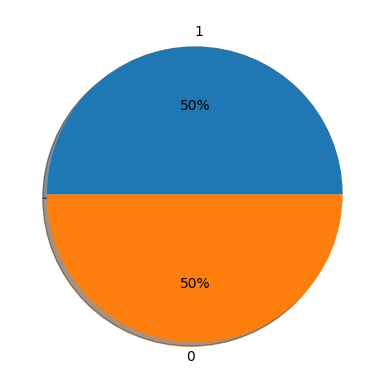

Status
0    2209
1    2209
Name: count, dtype: int64


In [51]:
status_count = df_final['Status'].value_counts()
labels = status_count.index.tolist()
status = y.value_counts()
myexplode = [0.1 if label == 'Dropout' else 0 for label in labels]
# Plot the pie chart
plt.pie(status, labels=labels, explode=myexplode, shadow=True, autopct='%.0f%%')
plt.show()
print(y.value_counts())

In [52]:
# split data menjadi training dan testing set dengan perbadingan 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [53]:
# Inisialisasi model RandomForestClassifier
model = RandomForestClassifier()

In [54]:
# Melatih Model
model.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
# Membuat prediksi
y_pred = model.predict(X_test)

## Evaluation

In [56]:
# tampilkan evaluasi
print("Train Score:", model.score(X_train, y_train))
print("Test Score:", model.score(X_test, y_test))

Train Score: 0.988398415393322
Test Score: 0.9038461538461539


In [57]:
# Menampilkan classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       432
           1       0.88      0.95      0.91       452

    accuracy                           0.90       884
   macro avg       0.91      0.90      0.90       884
weighted avg       0.91      0.90      0.90       884



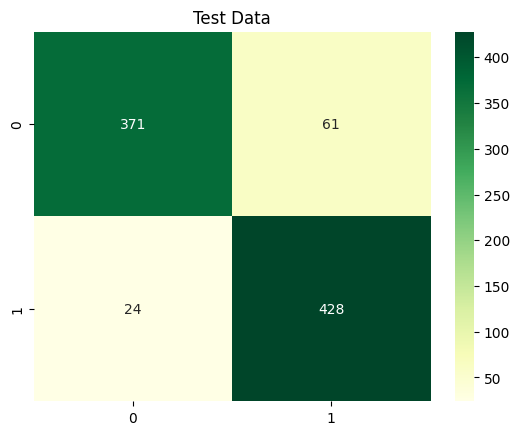

In [58]:
# Menampilkan confusion matrix
from sklearn import metrics
f,a =  plt.subplots(1,1,sharex=True,sharey=True,squeeze=False)

# plotting confusion matrix for the different models for the Testing Data
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test, y_pred)),annot=True,fmt='.5g',cmap="YlGn",ax=a[0][0]);
a[0][0].set_title('Test Data');

# Save Model

In [59]:
!pip install joblib

In [60]:
import joblib

joblib.dump(model, 'model.pkl')

['model.pkl']

# Test Model with New Data

In [61]:
import joblib

def get_user_input():
    p1 = float(input('Curricular_units_1st_sem_grade: '))
    p2 = float(input('Curricular_units_1st_sem_approved: '))
    p3 = float(input('Curricular_units_2nd_sem_grade: '))
    p4 = float(input('Curricular_units_2nd_sem_approved: '))
    p5 = float(input('Tuition_fees_up_to_date (Yes:1, No:0): '))
    p6 = float(input('Scholarship_holder (Yes:1, No:0): '))
    p7 = float(input('Age_at_enrollment: '))
    p8 = float(input('Debtor (Yes:1, No:0): '))
    p9 = float(input('Gender (Male:1, Female:0): '))
    p10 = float(input('Application_mode: '))

    return [p1, p2, p3, p4, p5, p6, p7, p8, p9, p10]

def predict_status():
    user_input = get_user_input()

    model = joblib.load('model.pkl')
    result = model.predict([user_input])

    print('Status Prediction:', result[0])

    with open('prediction.py', 'w') as f:
        f.write(f'Status Prediction: {result[0]}')

if __name__ == "__main__":
    predict_status()

Curricular_units_1st_sem_grade: 1
Curricular_units_1st_sem_approved: 2
Curricular_units_2nd_sem_grade: 2
Curricular_units_2nd_sem_approved: 3
Tuition_fees_up_to_date (Yes:1, No:0): 1
Scholarship_holder (Yes:1, No:0): 1
Age_at_enrollment: 18
Debtor (Yes:1, No:0): 1
Gender (Male:1, Female:0): 0
Application_mode: 17
Status Prediction: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
